In [7]:
try:
    import numpy as np
    import tensorflow as tf
    import os
    import warnings
    import matplotlib.pyplot as plt
    print("----Libraries Loaded----")
except:
    print("----Libraries Not Loaded----")

----Libraries Loaded----


In [9]:
os.chdir(r'C:\Users\HP\OneDrive\Desktop\Hand_Gesture_Recognition')
os.listdir()  #path where file is present
warnings.filterwarnings("ignore")   #remove warnings
print("----Folder Loaded----")
os.listdir()


----Folder Loaded----


['.ipynb_checkpoints', 'dataset', 'Untitled.ipynb']

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
training_path= 'C:/Users/HP/OneDrive/Desktop/Hand_Gesture_Recognition/dataset/train'
validation_path= 'C:/Users/HP/OneDrive/Desktop/Hand_Gesture_Recognition/dataset/validation'
train_datagen =ImageDataGenerator(
        rescale=1.0 / 255.0, 
        rotation_range=0,  
        zoom_range = 0.15,  
        width_shift_range=0.10,  
        height_shift_range=0.10,  
        horizontal_flip=False,  
        vertical_flip=False) 
val_datagen = ImageDataGenerator(rescale=1.0 / 255.0, 
        rotation_range=0,  
        zoom_range = 0.15,  
        width_shift_range=0.10,  
        height_shift_range=0.10,  
        horizontal_flip=False,  
        vertical_flip=False)
training_set = train_datagen.flow_from_directory(training_path,target_size=(64,64),batch_size=10,class_mode='categorical')
validation_set = val_datagen.flow_from_directory(validation_path,target_size=(64,64),batch_size=10,class_mode='categorical')
print("Dataset Loaded")

Found 7680 images belonging to 8 classes.
Found 1920 images belonging to 8 classes.
Dataset Loaded


In [38]:
#Building Model
cnn=tf.keras.models.Sequential()

#Adding Layers
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

# adding second block of the model
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

# adding third layer of the model
cnn.add(tf.keras.layers.Dropout(0.5))

# Flattening the model
cnn.add(tf.keras.layers.Flatten())

# adding the Dense layers
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

# adding the output layer
#Output Layer
cnn.add(tf.keras.layers.Dense(units=8,activation='softmax'))

print("Model Build Success")
cnn.summary()

Model Build Success
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 31, 31, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_16 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 flatten_6 (Flatten)         (None

In [39]:
#Compiling Of Model
cnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [40]:
#Training Of Model
training_history=cnn.fit(training_set,validation_data=validation_set,epochs=20)

Epoch 1/20
768/768 [==============================] - 207s 265ms/step - loss: 0.7626 - accuracy: 0.7182 - val_loss: 0.2717 - val_accuracy: 0.8964
Epoch 2/20
768/768 [==============================] - 150s 196ms/step - loss: 0.2159 - accuracy: 0.9288 - val_loss: 0.1191 - val_accuracy: 0.9495
Epoch 3/20
768/768 [==============================] - 151s 197ms/step - loss: 0.0990 - accuracy: 0.9674 - val_loss: 0.0637 - val_accuracy: 0.9818
Epoch 4/20
768/768 [==============================] - 151s 197ms/step - loss: 0.0698 - accuracy: 0.9779 - val_loss: 0.1152 - val_accuracy: 0.9635
Epoch 5/20
768/768 [==============================] - 152s 198ms/step - loss: 0.0783 - accuracy: 0.9763 - val_loss: 0.0333 - val_accuracy: 0.9911
Epoch 6/20
768/768 [==============================] - 150s 196ms/step - loss: 0.0454 - accuracy: 0.9850 - val_loss: 0.0393 - val_accuracy: 0.9875
Epoch 7/20
768/768 [==============================] - 153s 200ms/step - loss: 0.0495 - accuracy: 0.9868 - val_loss: 0.0189 -

In [41]:
#Saving Model
#cnn.save('trained_model.h5')

In [49]:
import json
m_json=cnn.to_json()
with open('training_hist.json','w') as json_file:
    json_file.write(m_json)
cnn.save_weights("HandsSignModel_weights.h5")

In [50]:
#Model Accuracy

print('Validation set Accuracy: {}%'.format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 99.79166388511658%


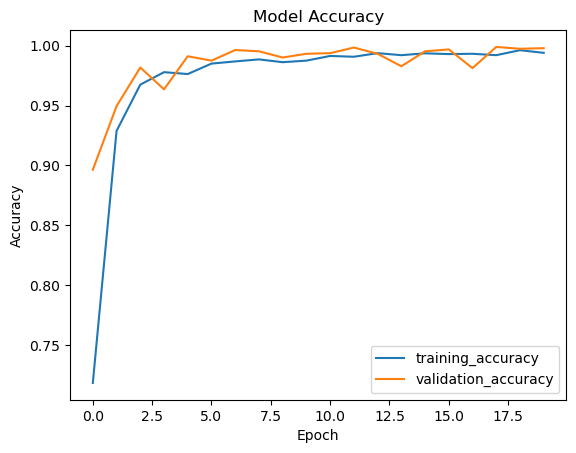

In [51]:
# Accuracy Visualization
plt.plot(training_history.history['accuracy'][0:220])
plt.plot(training_history.history['val_accuracy'][0:220])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training_accuracy', 'validation_accuracy'])
plt.show()

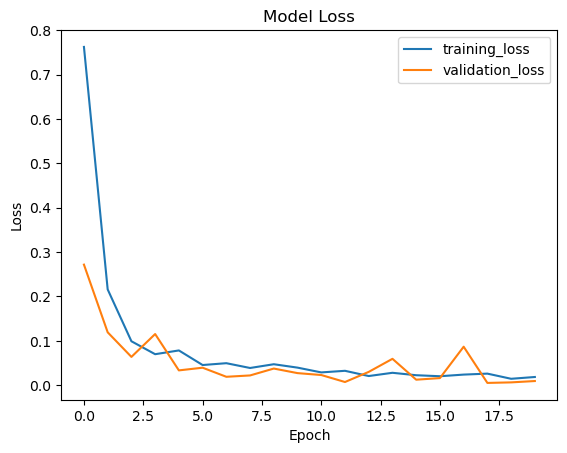

In [47]:
#Loss Visualization
plt.plot(training_history.history['loss'][0:220])
plt.plot(training_history.history['val_loss'][0:220])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training_loss', 'validation_loss'])
plt.show()